# Author Info
Name: **Ejaz-ur-Rehman**\
Business Unit Head | Data Analyst\
MBA (Accounting & Finance), MS (Finance)\
Crystal Tech (Project of MUZHAB Group)\
Karachi, Pakistan

![Date](https://img.shields.io/badge/Date-23--Aug--2025-green?logo=google-calendar)
[![Email](https://img.shields.io/badge/Email-ijazfinance%40gmail.com-blue?logo=gmail)](mailto:ijazfinance@gmail.com)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Ejaz--ur--Rehman-blue?logo=linkedin)](https://www.linkedin.com/in/ejaz-ur-rehman/)
[![GitHub](https://img.shields.io/badge/GitHub-ejazurrehman-black?logo=github)](https://github.com/ejazurrehman)

# Data Viz

In [14]:
# Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
# import data from seaborn library
df = sns.load_dataset("titanic")

<Axes: >

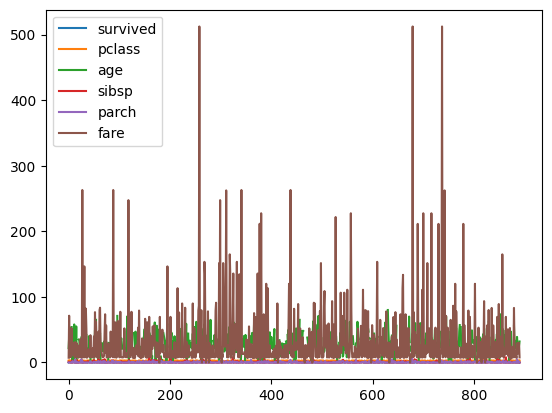

In [17]:
df.plot()

<Axes: xlabel='age', ylabel='fare'>

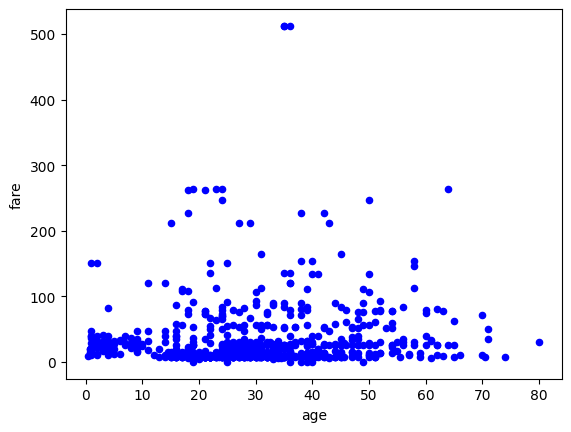

In [18]:
df.plot(kind='scatter', x='age', y='fare', color='blue')

<Axes: xlabel='age', ylabel='fare'>

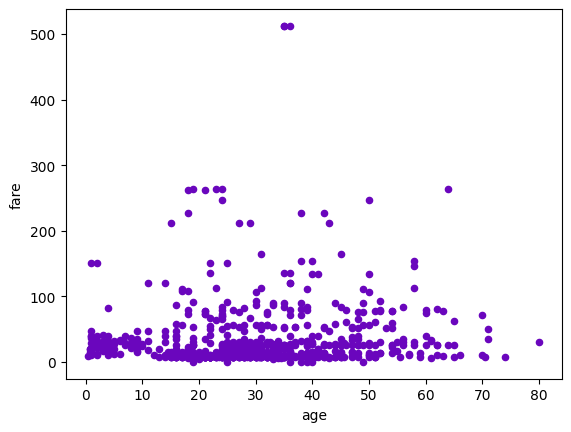

In [19]:
df.plot(kind='scatter', x='age', y='fare', color='#6a06bd')

Text(0, 0.5, 'Average Fare')

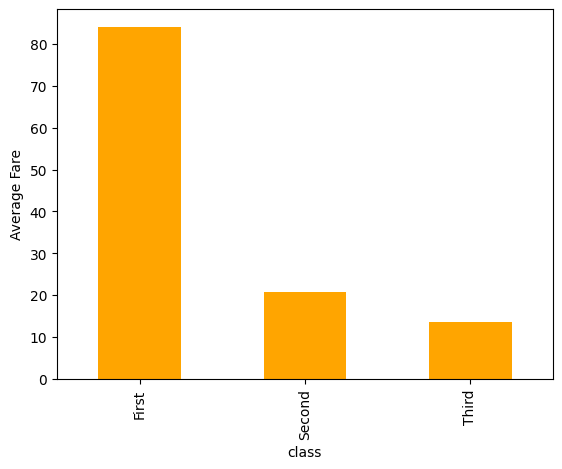

In [20]:
df.groupby('class')['fare'].mean().plot(kind='bar', color='orange').set_ylabel('Average Fare')

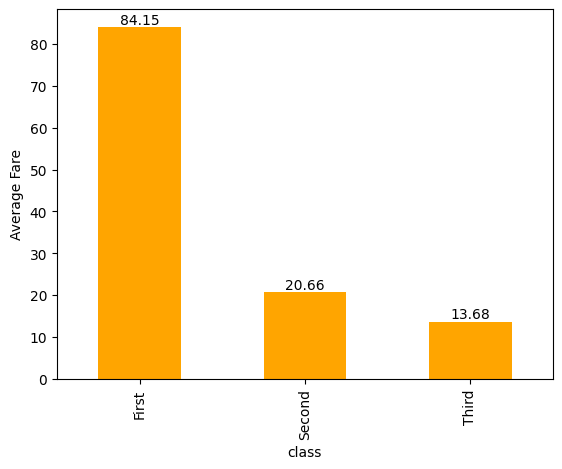

In [21]:
# Create bar plot with data labels
ax = df.groupby('class')['fare'].mean().plot(kind='bar', color='orange')
ax.set_ylabel('Average Fare')

# Add data labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,   # x-position (center of bar)
            p.get_height(),                # y-position (top of bar)
            round(p.get_height(), 2),      # label (rounded to 2 decimals)
            ha='center', va='bottom')      # alignment

plt.show()


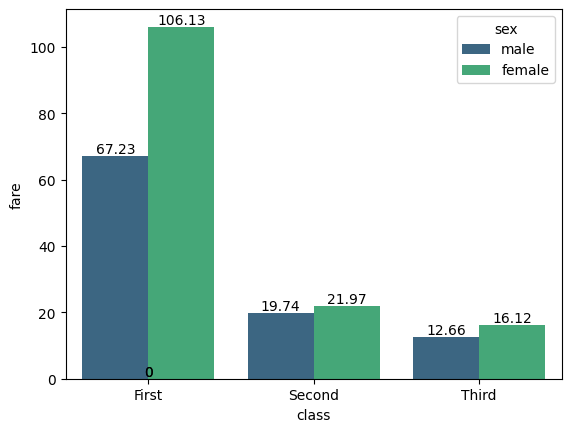

In [25]:
# bar plot using seaborn
ax = sns.barplot(x='class', y='fare', data=df, ci=None, palette='viridis', hue='sex')
# Add labels on each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,   # x position (center of bar)
            p.get_height(),                # y position (top of bar)
            round(p.get_height(), 2),      # label text (rounded)
            ha='center', va='bottom')      # alignment

plt.show()

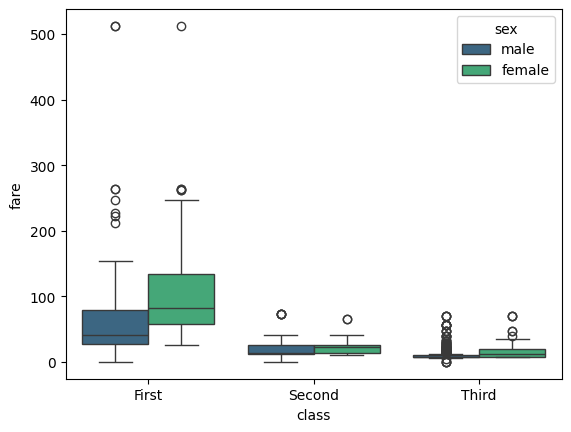

In [28]:
# box plot using seaborn
ax = sns.boxplot(x='class', y='fare', data=df, palette='viridis', hue='sex')



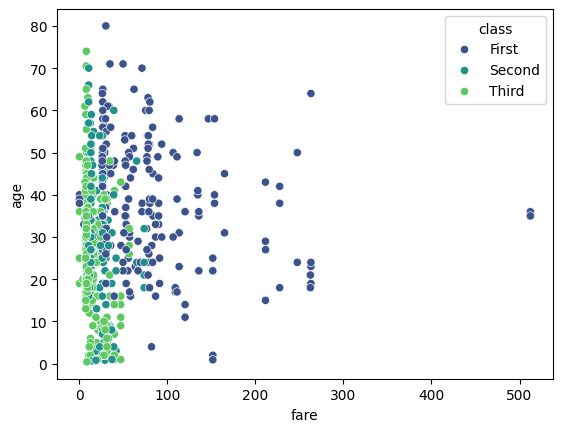

In [34]:
# scatter plot for fare and age
ax = sns.scatterplot(x='fare', y='age', data=df, hue='class', palette='viridis')
plt.show()

In [35]:
# prepare scatter plot via plotly
import plotly.express as px

fig = px.scatter(df, x='fare', y='age', color='class', title='Scatter plot of Fare vs Age')
fig.show()

In [38]:
import plotly.graph_objects as go

# Create pivot table (aggregates duplicate age/class pairs by mean fare)
pivot_df = df.pivot_table(index="age", columns="class", values="fare", aggfunc="mean")

# Build surface plot
fig = go.Figure(data=[go.Surface(
    z=pivot_df.values, 
    x=pivot_df.columns,   # class (columns)
    y=pivot_df.index,     # age (index)
    colorscale='Viridis'
)])

# Update layout
fig.update_layout(
    title='3D Surface Plot of Fare vs Age vs Class',
    scene=dict(
        xaxis_title='Class',
        yaxis_title='Age',
        zaxis_title='Fare'
    )
)

fig.show()


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Political candidate voting pool analysis'),
    html.P("Select a candidate:"),
    dcc.RadioItems(
        id='candidate',
        options=["Joly", "Coderre", "Bergeron"],
        value="Coderre",
        inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("candidate", "value"))
def display_choropleth(candidate):
    df = px.data.election()  # example dataset
    geojson = px.data.election_geojson()

    fig = px.choropleth_mapbox(
        df, geojson=geojson, color=candidate,
        locations="district", featureidkey="properties.district",
        center={"lat": 45.5517, "lon": -73.7073}, zoom=9,
        range_color=[0, 6500],
        mapbox_style="carto-positron"
    )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    return fig


if __name__ == "__main__":
    app.run(debug=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_20872\1799591231.py:26: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\DELL\AppData\Local\Temp\ipykernel_20872\1799591231.py:26: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\DELL\AppData\Local\Temp\ipykernel_20872\1799591231.py:26: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [42]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [53]:
import seaborn as sns
import plotly.express as px

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Create animated scatter
fig = px.scatter(
    df,
    x="fare", 
    y="age",
    animation_frame="class",   # animate across passenger classes
    size="fare", 
    color="sex",
    hover_name="embarked",
    size_max=50,
    range_x=[0, 600],
    range_y=[0, 80]
)

# Control animation speed
fig.update_layout(
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1500, "redraw": True},  # 1500ms per frame
                                "transition": {"duration": 800}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False}, 
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ]
    }]
)

fig.show()


In [54]:
import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()